In [1]:
print("""This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, Exact and universal quantum Monte Carlo estimators for energy susceptibility and fidelity susceptibility, arXiv:2408.03924 (2024).""")

This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, Exact and universal quantum Monte Carlo estimators for energy susceptibility and fidelity susceptibility, arXiv:2408.03924 (2024).


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import sys
import scipy
#sys.path.append("../../utils")
from exact_calculations import (prl_gs_chiE, prl_gs_chiF, prl_beta_chiE,
prl_beta_chiX, prl_beta_chiF, prl_gs_fidsus)

matplotlib.style.use("./style.mplstyle")
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

In [6]:
fname = "../data/zhang_prl_rot_model_fidsus_curve_data_2024-05-22_09-03-35.csv"
cols = ["n", "lam", "beta", "H1", "H1_std", "int1", "int1_std", "int2", "int2_std", "int3", "int3_std", "rng", "eps" ,"l", "Tsteps", "steps", "stepsPerMeasurement", "sign", "sign_std", "q", "qmax", "time"]
df = pd.read_csv(fname, names=cols, skiprows=1)
# add fid sus column
df['fidsus'] = (df.int3 - (df.beta*df.H1)**2/8)
# add energy suscepibility column
df['chiE'] = (df.int1 - df.beta*(df.H1)**2)
# add int2 suscepibility column
df['chiX'] = df.int2 - (df.beta*df.H1)**2/2
df.head()

,n,lam,beta,H1,H1_std,int1,int1_std,int2,int2_std,int3,...,steps,stepsPerMeasurement,sign,sign_std,q,qmax,time,fidsus,chiE,chiX
0,100,-1.500000,20.0,1.956964,0.003010,76.798170,0.215473,767.983590,2.154471,191.676787,...,1000000,10,1.0,0.0,0.86751,8,23.21,0.191378,0.204006,2.041955
1,100,-1.484925,20.0,1.955210,0.003142,76.661163,0.223610,766.611446,2.236057,191.312593,...,1000000,10,1.0,0.0,0.88360,8,23.73,0.170198,0.204205,2.041865
2,100,-1.469849,20.0,1.953423,0.003361,76.525052,0.235588,765.254926,2.355497,190.946131,...,1000000,10,1.0,0.0,0.89642,8,24.01,0.153005,0.207802,2.082424
3,100,-1.454774,20.0,1.952517,0.003236,76.429859,0.234534,764.297401,2.345303,190.687117,...,1000000,10,1.0,0.0,0.90233,8,23.79,0.070970,0.183400,1.832811
4,100,-1.439698,20.0,1.947591,0.003508,76.108199,0.253734,761.081781,2.537581,189.844595,...,1000000,10,1.0,0.0,0.94797,8,24.81,0.189151,0.246022,2.460006


In [7]:
# compute exact values of observables at T = 0
lam_pts = np.sort(np.unique(df.lam))
gs_beta_vals = [r"$\infty$" for _ in lam_pts]
gs_chiE_vals = [prl_gs_chiE(lam)[0] for lam in lam_pts]
gs_fidsus_vals1 = [prl_gs_chiF(lam)[0] for lam in lam_pts]
gs_fidsus_vals2 = [prl_gs_fidsus(lam) for lam in lam_pts]
gs_exact_dict = {"lam": lam_pts, "beta": gs_beta_vals, "chiE": gs_chiE_vals,
                 "fidsus": gs_fidsus_vals1, "fidsus2": gs_fidsus_vals2}
gs_exact_df = pd.DataFrame(gs_exact_dict)

In [8]:
gs_exact_df.head()

,lam,beta,chiE,fidsus,fidsus2
0,-1.500000,$\infty$,0.144247,0.069657,0.069683
1,-1.484925,$\infty$,0.157080,0.078039,0.078069
2,-1.469849,$\infty$,0.171443,0.087696,0.087730
3,-1.454774,$\infty$,0.187566,0.098860,0.098900
4,-1.439698,$\infty$,0.205719,0.111818,0.111865


In [9]:
# compute exact values of observables at finite beta
lam_pts = np.sort(np.unique(df.lam))
beta = 20.0
beta_beta_vals = [beta for _ in lam_pts]
beta_lam_vals = [lam for lam in lam_pts]
beta_beta_val = [beta for _ in lam_pts]
beta_chiE_vals = [prl_beta_chiE(lam, beta)[0] for lam in lam_pts]
beta_fidsus_vals = [prl_beta_chiF(lam, beta)[0] for lam in lam_pts] 
beta_exact_dict = {"lam": beta_lam_vals, "beta": beta_beta_vals, "chiE": beta_chiE_vals,
                 "fidsus": beta_fidsus_vals}
beta_exact_df = pd.DataFrame(beta_exact_dict)

## Fid sus plot

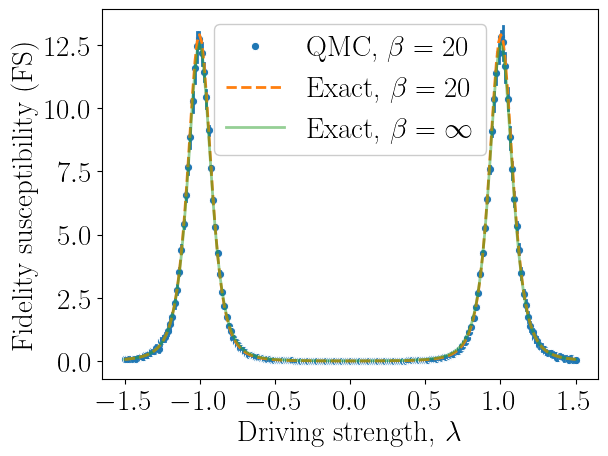

In [10]:
lineplot = sns.lineplot(x="lam", y="fidsus", data=df, marker='o', linestyle='', err_style='bars', markersize=6, label=r"QMC, $\beta=20$")
lineplot = sns.lineplot(x="lam", y="fidsus", data=beta_exact_df, alpha=1, label=r"Exact, $\beta=20$", linestyle="dashed")
lineplot = sns.lineplot(x="lam", y="fidsus", data=gs_exact_df, alpha=0.5, label=r"Exact, $\beta = \infty$", linestyle="solid")
lineplot.set_xticks([-1.5, -1, -0.5, 0, 0.5, 1.0, 1.5])
#lineplot.set_xlabel(r"$\lambda$")
#lineplot.set_ylabel(r"$\chi_F^{\beta}(\lambda)$")
lineplot.set_xlabel(r"Driving strength, $\lambda$")
lineplot.set_ylabel(r"Fidelity susceptibility (FS)")
fig = lineplot.get_figure()
fig.savefig("figures/fig2d_rot_fidsus_plot.pdf", dpi=800, bbox_inches="tight")

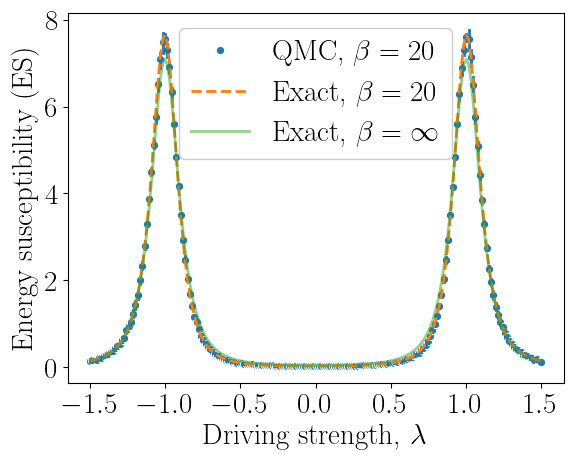

In [11]:
lineplot = sns.lineplot(x="lam", y="chiE", data=df, marker='o', linestyle='', err_style='bars', markersize=6, label=r"QMC, $\beta=20$")
lineplot = sns.lineplot(x="lam", y="chiE", data=beta_exact_df, alpha=1, label=r"Exact, $\beta=20$", linestyle="dashed")
lineplot = sns.lineplot(x="lam", y="chiE", data=gs_exact_df, alpha=0.5, label=r"Exact, $\beta = \infty$", linestyle="solid")
lineplot.set_xticks([-1.5, -1, -0.5, 0, 0.5, 1.0, 1.5])
#lineplot.set_xlabel(r"$\lambda$")
#lineplot.set_ylabel(r"$\chi_E^{\beta}(\lambda)$")
lineplot.set_xlabel(r"Driving strength, $\lambda$")
lineplot.set_ylabel(r"Energy susceptibility (ES)")
fig = lineplot.get_figure()
fig.savefig("figures/fig2c_rot_chiE_plot.pdf", dpi=800, bbox_inches="tight")